### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Importing the dataset

In [2]:
df= pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.shape

(150, 6)

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

# Drop Unwanted Columns

In [7]:
df.drop('Id',axis=1,inplace=True)

# Exploratory Data Analysis

### Sepal

Text(0.5, 1.0, 'Sepal Length vs Width')

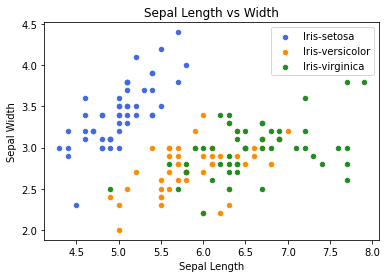

In [8]:
fig = df[df.Species == 'Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='royalblue',label='Iris-setosa')
df[df.Species == 'Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='darkorange',label='Iris-versicolor',ax=fig)
df[df.Species == 'Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='forestgreen',label='Iris-virginica',ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length vs Width')

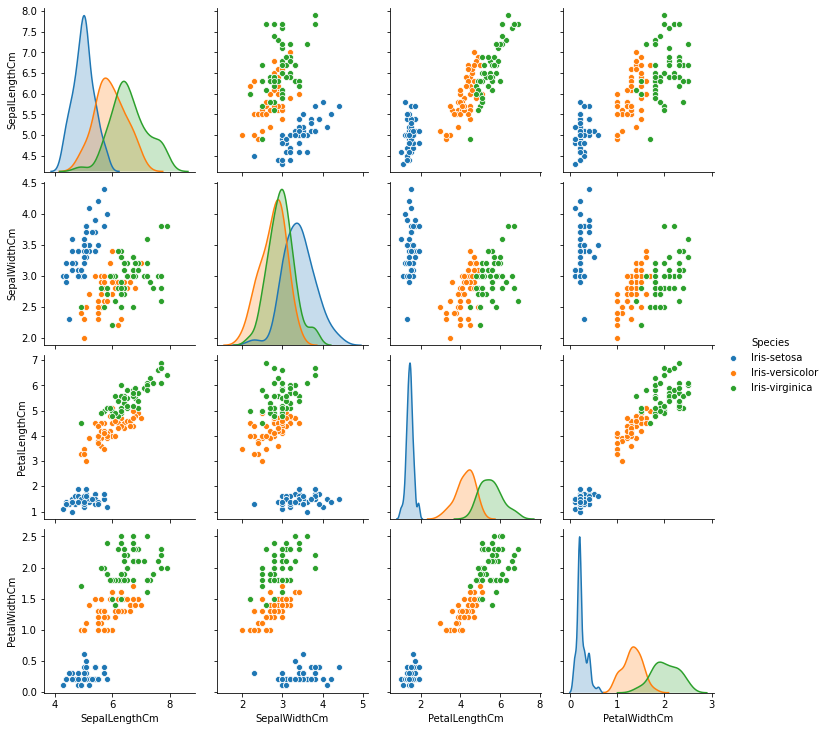

In [30]:
sns.pairplot(df, hue='Species')

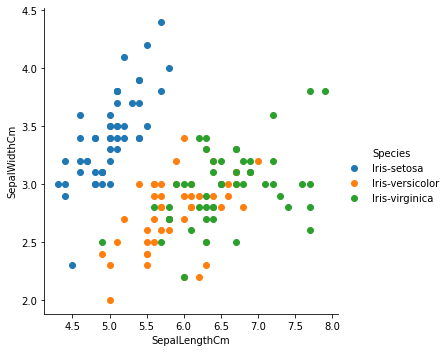

In [9]:
sns.FacetGrid(df, hue='Species',height=5)\
.map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
.add_legend()

### Petal

Text(0.5, 1.0, 'Petal Length vs Width')

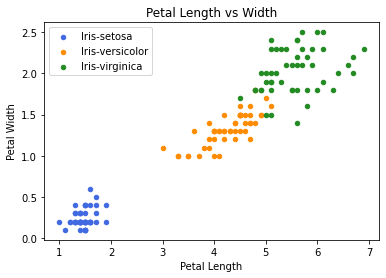

In [10]:
fig = df[df.Species == 'Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='royalblue',label='Iris-setosa')
df[df.Species == 'Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='darkorange',label='Iris-versicolor',ax=fig)
df[df.Species == 'Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='forestgreen',label='Iris-virginica',ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length vs Width')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82a23c4b90>,
      dtype=object)

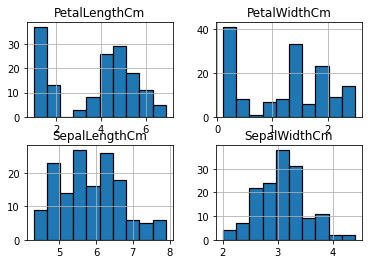

In [11]:
df.hist(edgecolor='black',linewidth=1.2)

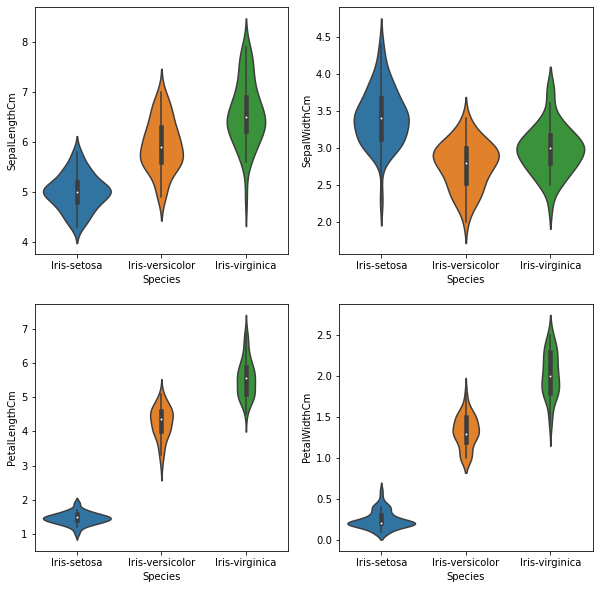

In [12]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.violinplot(data=df, x='Species',y='SepalLengthCm')
plt.subplot(2,2,2)
sns.violinplot(data=df, x='Species',y='SepalWidthCm')

plt.subplot(2,2,3)
sns.violinplot(data=df,x='Species', y='PetalLengthCm')
plt.subplot(2,2,4)
sns.violinplot(data=df, x='Species', y='PetalWidthCm')

As this is a **Classification Problem**, we will use Classification Algorithms to build our model.

### Importing Packages for Classification algorithms

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

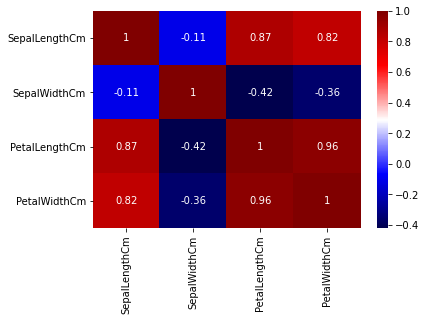

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='seismic')
plt.show()

In the above figure, we can see that Sepal Length and Width are not correlated. While, the Petal Length and Width are *highly correlated*.

## 1. We will use "ALL" the features to Train the algorithm and Check the accuracy.

### Splitting the data into Train and Test set

In [15]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [17]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8


In [18]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [19]:
y_train.head()

60     Iris-versicolor
116     Iris-virginica
144     Iris-virginica
119     Iris-virginica
108     Iris-virginica
Name: Species, dtype: object

### Logistic Regression (LR)

In [20]:
model = LogisticRegression()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(prediction,y_test))

Logistic Regression accuracy =  0.9777777777777777


### Support Vector Machine (SVM)

In [21]:
model = svm.SVC()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print('SVM accuracy = ', metrics.accuracy_score(prediction,y_test))

SVM accuracy =  0.9777777777777777


### Decision Tree

In [22]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print('Decision Tree accuracy = ', metrics.accuracy_score(prediction,y_test))

Decision Tree accuracy =  0.9777777777777777


### K-Nearest Neighbors (KNN)

In [23]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

prediction = model.predict(X_test)
print('KNN accuracy = ', metrics.accuracy_score(prediction,y_test))

KNN accuracy =  0.9777777777777777


**CONCLUSION:** By applying the above 4 Machine Learning algorithms, we see that all our models give the exact same High Accuracy.

## 2. We will use "Sepal and Petal features separately" to Train the algorithm and Check the accuracy.

### Splitting the Sepal data and Petal data into Train and Test set

### Sepal

In [24]:
sepal_X = df[['SepalLengthCm','SepalWidthCm']]
sepal_y = df['Species']

sepal_X_train, sepal_X_test, sepal_y_train, sepal_y_test = train_test_split(sepal_X, sepal_y, test_size=0.3,random_state=0)

### Petal

In [25]:
petal_X = df[['PetalLengthCm','PetalWidthCm']]
petal_y = df['Species']

petal_X_train, petal_X_test, petal_y_train, petal_y_test = train_test_split(petal_X, petal_y, test_size=0.3,random_state=0)

### Logistic Regression (LR)

In [26]:
model = LogisticRegression()

model.fit(sepal_X_train,sepal_y_train)

prediction = model.predict(sepal_X_test)
print('Logistic Regression accuracy for Sepal = ', metrics.accuracy_score(prediction,sepal_y_test))

model.fit(petal_X_train,petal_y_train)

prediction = model.predict(petal_X_test)
print('Logistic Regression accuracy for Petal = ', metrics.accuracy_score(prediction,petal_y_test))

Logistic Regression accuracy for Sepal =  0.8222222222222222
Logistic Regression accuracy for Petal =  0.9777777777777777


### Support Vector Machine (SVM)

In [27]:
model = svm.SVC()

model.fit(sepal_X_train,sepal_y_train)

prediction = model.predict(sepal_X_test)
print('SVM accuracy for Sepal = ', metrics.accuracy_score(prediction,sepal_y_test))

model.fit(petal_X_train,petal_y_train)

prediction = model.predict(petal_X_test)
print('SVM accuracy for Petal = ', metrics.accuracy_score(prediction,petal_y_test))

SVM accuracy for Sepal =  0.8
SVM accuracy for Petal =  0.9777777777777777


### Decision Tree

In [28]:
model = DecisionTreeClassifier()

model.fit(sepal_X_train,sepal_y_train)

prediction = model.predict(sepal_X_test)
print('Decision Tree accuracy for Sepal = ', metrics.accuracy_score(prediction,sepal_y_test))

model.fit(petal_X_train,petal_y_train)

prediction = model.predict(petal_X_test)
print('Decision Tree accuracy for Petal = ', metrics.accuracy_score(prediction,petal_y_test))

Decision Tree accuracy for Sepal =  0.6666666666666666
Decision Tree accuracy for Petal =  0.9555555555555556


### K-Nearest Neighbors (KNN)

In [29]:
model = KNeighborsClassifier()

model.fit(sepal_X_train,sepal_y_train)

prediction = model.predict(sepal_X_test)
print('KNN accuracy for Sepal = ', metrics.accuracy_score(prediction,sepal_y_test))

model.fit(petal_X_train,petal_y_train)

prediction = model.predict(petal_X_test)
print('KNN accuracy for Petal = ', metrics.accuracy_score(prediction,petal_y_test))

KNN accuracy for Sepal =  0.7333333333333333
KNN accuracy for Petal =  0.9777777777777777


**CONCLUSION:** By applying the above 4 Machine Learning algorithms, we see that using Petal over Sepal gives us more accuracy.